In [ ]:
from agents import Agent, Runner, function_tool, ItemHelpers

@function_tool
def get_weather(city: str):
    """Get the weather in a given city"""
    # print(f"Getting weather for {city}")
    return "30도 맑음"

agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. User tools when need to answer questions",
    tools=[get_weather],
)

stream = Runner.run_streamed(agent, "안녕 잘 지내니? 한국의 날씨는 어떄?")

async for event in stream.stream_events():
    if event.type == "raw_response_event":
        continue
    elif event.type == "agent_updated_stream_event":
        print("에이전트 업데이트 ▶ ", event.new_agent.name)
    elif event.type == "run_item_stream_event":
        if event.item.type == "tool_call_item":
            print(event.item.raw_item.to_dict())
        elif event.item.type == "tool_call_output_item":
            print(event.item.output)
        elif event.item.type == "message_output_item":
            print(ItemHelpers.text_message_output(event.item) )

    
    # print(event.type)
    print("="*20)


In [ ]:
from agents import Agent, Runner, function_tool, ItemHelpers

@function_tool
def get_weather(city: str):
    """Get the weather in a given city"""
    # print(f"Getting weather for {city}")
    return "30도 맑음"

agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. User tools when need to answer questions",
    tools=[get_weather],
)

stream = Runner.run_streamed(agent, "안녕 잘 지내니? 한국의 날씨는 어떄?")

message = ""
args = ""

async for event in stream.stream_events():
    if event.type == "raw_response_event":
        event_type = event.data.type

        if event_type == "response.output_text.delta":
            message += event.data.delta
            print(message)
        elif event_type == "response.function_call_arguments.delta":
            args += event.data.delta
            print(args)
        elif event_type == "response.completed":
            message = ""
            args = ""
    


In [ ]:
# SQLite 메모리 세션 구현
from agents import Agent, Runner, function_tool, ItemHelpers, SQLiteSession

session = SQLiteSession("user2", "ai-memory.db")

@function_tool
def get_weather(city: str):
    """Get the weather in a given city"""
    # print(f"Getting weather for {city}")
    return "30도 맑음"

agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. User tools when need to answer questions",
    tools=[get_weather],
)




In [ ]:
result = await Runner.run(agent, "내 이름은 뭔가요?", session=session)

print(result.final_output)

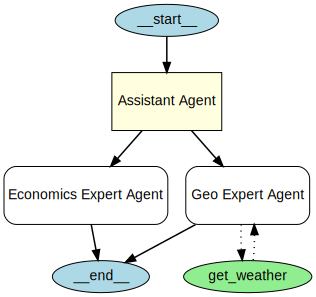

In [6]:
# SQLite 메모리 세션 구현
from agents import Agent, Runner, ItemHelpers, SQLiteSession, function_tool, trace
from agents.extensions.visualization import draw_graph
from pydantic import BaseModel



@function_tool
def get_weather(city: str):
    """Get the weather in a given city"""
    # print(f"Getting weather for {city}")
    return "30도 맑음"

session = SQLiteSession("user11111", "ai-memory.db")

class Answer(BaseModel):
    answer: str
    background_explanation: str


geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer questions related to geography.",  # 메인 agent에게 전달할 이 agent에 대한 설명
    tools=[get_weather],
    output_type=Answer
)

economics_agent = Agent(
    name="Economics Expert Agent",
    instructions="You are a expert in economics, you answer questions related to them.",
    handoff_description="Use this to answer questions related to economics."
)

main_agent = Agent(
    name="Assistant Agent",
    instructions="You are a user facing agent. Transfer to the agent monst capable of answering the user's question.",
    handoffs=[
        economics_agent,
        geaography_agent
    ]
)


draw_graph(main_agent)

In [ ]:
# https://platform.openai.com/logs/trace
with trace("user11111"):    
    result = await Runner.run(
        main_agent,
        input="대한민국 북부 지방의 주도는 어디인가요?",
        session=session,
    )

    result = await Runner.run(
        main_agent,
        input="캄보디아 북부 지방의 주도는 어디인가요?",
        session=session,
    )

    result = await Runner.run(
        main_agent,
        input="중국 북부 지방의 주도는 어디인가요?",
        session=session,
    )
